In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdb-flat-prices-19902021-march/HDB machine learning.xlsx
/kaggle/input/hdb-flat-prices-19902021-march/gni per capita.csv
/kaggle/input/hdb-flat-prices-19902021-march/complete.csv
/kaggle/input/hdb-flat-prices-19902021-march/ALL Prices 1990-2021 mar.csv
/kaggle/input/hdb-flat-prices-19902021-march/MAS Core Inflation.csv
/kaggle/input/hdb-flat-prices-19902021-march/dummy variable.csv
/kaggle/input/hdb-flat-prices-19902021-march/Balas Table.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../input/hdb-flat-prices-19902021-march/ALL Prices 1990-2021 mar.csv')

In [4]:
data

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,...,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
0,1990-01,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,10.997442,61.59,139633.05730,1517.750623,92.9,88869.752422,965.975570,144292.502700,1568.396769,22901
1,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.464849,61.59,95794.77188,1168.228925,92.9,60968.783638,743.521752,98991.368143,1207.211806,22901
2,1990-01,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,...,7.606769,61.59,76635.81750,1049.805719,92.9,48775.026911,668.151054,79193.094510,1084.836911,22901
3,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.287972,61.59,76635.81750,1143.818172,92.9,48775.026911,727.985476,79193.094510,1181.986486,22901
4,1990-01,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,...,11.484353,61.59,129891.21610,1603.595261,93.3,82315.112540,1016.235957,133650.125891,1650.001555,22901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840913,2021-03,2021,YISHUN,5,3 ROOM,110,YISHUN RING RD,110 YISHUN RING RD SINGAPORE,1.433340,103.829168,...,66.650391,100.40,271912.35060,4248.630478,82.4,318058.252427,4969.660194,316791.088078,4949.860751,75000
840914,2021-03,2021,YISHUN,5,3 ROOM,712,YISHUN AVE 5,712 YISHUN AVE 5 SINGAPORE,1.430248,103.828862,...,63.567362,100.40,266932.27090,3925.474573,81.2,316847.290640,4659.518980,315584.950818,4640.955160,75000
840915,2021-03,2021,YISHUN,5,2 ROOM,424B,YISHUN AVE 11,424B YISHUN AVE 11 SINGAPORE,1.423215,103.848264,...,59.482956,100.40,258964.14340,5509.875392,95.2,262184.873950,5578.401574,261140.312672,5556.176866,75000
840916,2021-03,2021,YISHUN,5,2 ROOM,459,YISHUN AVE 11,459 YISHUN AVE 11 SINGAPORE,1.421059,103.846357,...,57.234432,100.40,249003.98410,5187.583001,94.8,253164.556962,5274.261603,252155.933266,5253.248609,75000


In [5]:
data.isna()

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,...,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
840914,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
840915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
840916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
missing_percent = data.isna().sum()/data.shape[0] * 100

In [7]:
missing_percent

month                              0.0
year                               0.0
town                               0.0
town_dummy                         0.0
flat_type                          0.0
block                              0.0
street_name                        0.0
address                            0.0
latitude                           0.0
longitude                          0.0
storey_range                       0.0
storey                             0.0
area_sqm                           0.0
flat_model                         0.0
lease_start                        0.0
lease_rem                          0.0
resale_price                       0.0
price_psm                          0.0
price_psm_yearly                   0.0
Core CPI                           0.0
price cpi_adj                      0.0
price_psm cpi_adj                  0.0
bala lease pct                     0.0
price lease_adj implied            0.0
price_psm lease_adj implied        0.0
price cpi_lease_adj impli

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840918 entries, 0 to 840917
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   month                            840918 non-null  object 
 1   year                             840918 non-null  int64  
 2   town                             840918 non-null  object 
 3   town_dummy                       840918 non-null  int64  
 4   flat_type                        840918 non-null  object 
 5   block                            840918 non-null  object 
 6   street_name                      840918 non-null  object 
 7   address                          840918 non-null  object 
 8   latitude                         840918 non-null  float64
 9   longitude                        840918 non-null  float64
 10  storey_range                     840918 non-null  object 
 11  storey                           840918 non-null  int64  
 12  ar

In [9]:
data.describe()

,year,town_dummy,latitude,longitude,storey,area_sqm,lease_start,lease_rem,resale_price,price_psm,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
count,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,8.409180e+05,840918.000000,840918.000000,840918.000000,8.409180e+05,840918.000000,840918.000000,8.409180e+05,840918.000000,8.409180e+05,840918.000000,840918.000000
mean,2004.512196,3.892261,1.361102,103.839049,7.567124,95.608704,1987.313952,81.780300,2.968002e+05,3062.232943,38.780054,80.222704,3.607913e+05,3718.709303,90.998891,3.142900e+05,3262.187707,3.808532e+05,3948.732221,49518.956025
std,8.135802,1.403197,0.041576,0.073889,4.657776,26.026266,9.637392,9.959341,1.509764e+05,1299.310863,19.256850,10.545238,1.616870e+05,1241.736956,4.407041,1.614892e+05,1453.964069,1.696361e+05,1381.597677,15844.785659
min,1990.000000,1.000000,1.266682,103.685206,2.000000,28.000000,1966.000000,45.000000,5.000000e+03,161.290323,1.920123,61.478000,8.074414e+03,260.464961,71.800000,5.183585e+03,167.212429,8.370883e+03,270.028469,22901.000000
25%,1998.000000,2.000000,1.333346,103.772844,5.000000,73.000000,1980.000000,75.000000,1.830000e+05,2238.095238,26.435374,72.429000,2.432166e+05,2975.961115,88.500000,1.932075e+05,2331.203240,2.583465e+05,3106.848880,37363.000000
50%,2003.000000,4.000000,1.354131,103.842792,8.000000,93.000000,1986.000000,83.000000,2.780000e+05,2797.619048,33.491765,75.954000,3.442474e+05,3610.835922,92.200000,2.931064e+05,2917.886452,3.652154e+05,3793.907869,40870.000000
75%,2010.000000,5.000000,1.380824,103.897752,11.000000,114.000000,1995.000000,90.000000,3.870000e+05,3818.181818,48.392057,87.810000,4.564779e+05,4399.740077,94.600000,4.103072e+05,4092.702169,4.799981e+05,4687.830912,63712.000000
max,2021.000000,6.000000,1.457052,103.988777,50.000000,307.000000,2019.000000,101.000000,1.258000e+06,12762.236560,211.640210,100.400000,1.260787e+06,12798.071160,96.000000,1.492913e+06,13599.370898,1.502756e+06,14036.901102,79517.000000


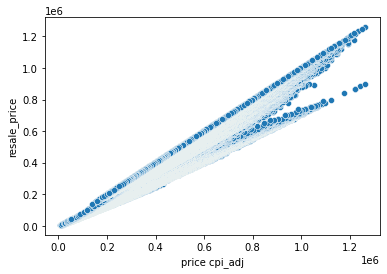

In [10]:
sns.scatterplot(x='price cpi_adj', y='resale_price', data=data,);

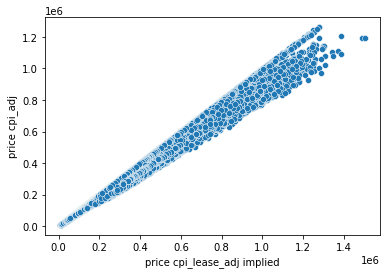

In [11]:
sns.scatterplot(x='price cpi_lease_adj implied', y='price cpi_adj', data=data);

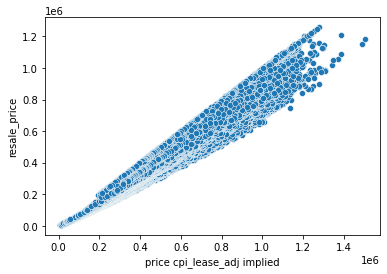

In [12]:
sns.scatterplot(x='price cpi_lease_adj implied', y='resale_price', data=data);

In [13]:
X = data[['price cpi_adj', 'resale_price']]
y = data['price cpi_lease_adj implied']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588642, 2), (252276, 2), (588642,), (252276,))

Simple Linear Model

In [17]:
from sklearn.linear_model import LinearRegression as LR

In [18]:
lr1 = LR()
lr1.fit(X_train, y_train)
lr1.intercept_, lr1.coef_

(12741.491867632372, array([0.80152935, 0.26599215]))

In [19]:
y_pred1 = lr1.predict(X_test)

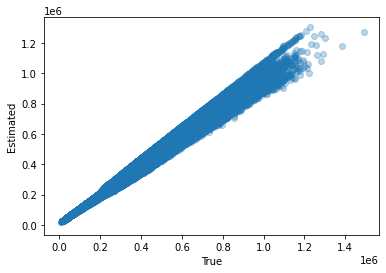

In [20]:

plt.scatter(y_test, y_pred1, alpha=0.3);

plt.plot(np.linspace(0, 15, 500),
         np.linspace(0, 15, 500), c='red')

plt.xlabel('True');
plt.ylabel('Estimated');

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [22]:
steps = [('feature engineering', PolynomialFeatures(degree=2)),
         ('linear regression', LR())]

lr2 = Pipeline(steps=steps)
lr2.fit(X_train, y_train)

Pipeline(steps=[('feature engineering', PolynomialFeatures()),
                ('linear regression', LinearRegression())])

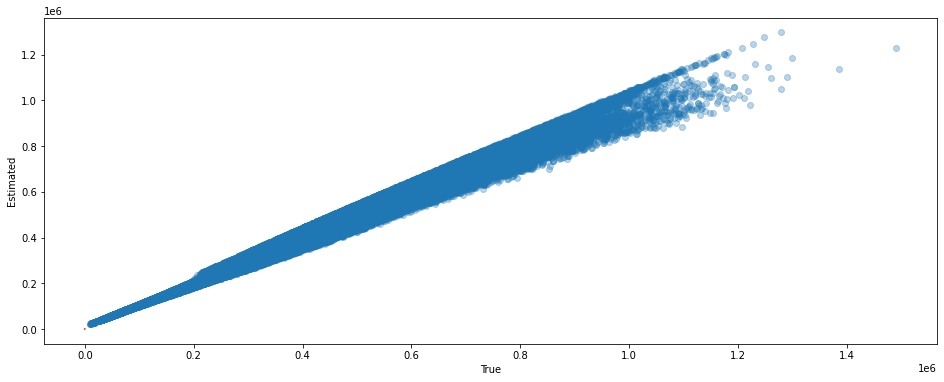

In [23]:
plt.figure(figsize=(16,6))
y_pred2 = lr2.predict(X_test)
plt.scatter(y_test, y_pred2, alpha=0.3);

plt.plot(np.linspace(-1, 12, 25000),
         np.linspace(-1, 12, 25000), c='red')

plt.xlabel('True');
plt.ylabel('Estimated');

In [24]:
from sklearn.linear_model import Ridge

In [25]:
lr3 = Ridge(alpha=100000)
lr3.fit(X_train, y_train)

Ridge(alpha=100000)

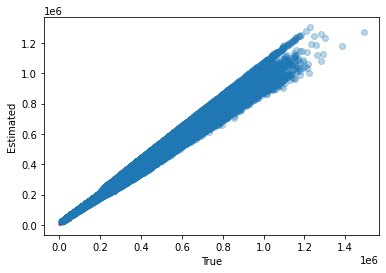

In [26]:
y_pred3 = lr3.predict(X_test)
plt.scatter(y_test, y_pred3, alpha=0.3);

plt.plot(np.linspace(-1, 12, 25000),
         np.linspace(-1, 12, 25000), c='red')
plt.xlabel('True');
plt.ylabel('Estimated');

In [27]:
from sklearn.metrics import max_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
print('Model 1:', max_error(y_true=y_test, y_pred=y_pred1))
print('Model 2:', max_error(y_true=y_test, y_pred=y_pred2))
print('Model 3:', max_error(y_true=y_test, y_pred=y_pred3))

Model 1: 217750.62168814428
Model 2: 260797.60968782566
Model 3: 217750.62168557302


In [29]:
print('Model 1:', mean_absolute_error(y_true=y_test, y_pred=y_pred1))
print('Model 2:', mean_absolute_error(y_true=y_test, y_pred=y_pred2))
print('Model 3:', mean_absolute_error(y_true=y_test, y_pred=y_pred3))

Model 1: 12786.687796791553
Model 2: 12411.089519537678
Model 3: 12786.687796767608


In [30]:
print('Model 1:', mean_squared_error(y_true=y_test, y_pred=y_pred1))
print('Model 2:', mean_squared_error(y_true=y_test, y_pred=y_pred2))
print('Model 3:', mean_squared_error(y_true=y_test, y_pred=y_pred3))

Model 1: 343319805.01725644
Model 2: 335741251.3127674
Model 3: 343319805.0172658


In [31]:
print('Model 1:', r2_score(y_true=y_test, y_pred=y_pred1))
print('Model 2:', r2_score(y_true=y_test, y_pred=y_pred2))
print('Model 3:', r2_score(y_true=y_test, y_pred=y_pred3))

Model 1: 0.9880736471542598
Model 2: 0.9883369133690814
Model 3: 0.9880736471542595
